In [1]:
# Importing libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Datasets

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.shape, test.shape

((8523, 12), (5681, 11))

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [6]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
Sales = train["Item_Outlet_Sales"]
train.corrwith(train.Item_Outlet_Sales).sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
dtype: float64

**Remark: Sales highly correlated with MRP**

In [7]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**Check number of unique values in categorical attributes**

In [8]:
print(train.Outlet_Establishment_Year.unique())
print(train.Outlet_Establishment_Year.nunique())
print(train.Outlet_Establishment_Year.value_counts())

[1999 2009 1998 1987 1985 2002 2007 1997 2004]
9
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64


In [9]:
print(train.Item_Fat_Content.unique())
print(test.Item_Fat_Content.unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Low Fat' 'reg' 'Regular' 'LF' 'low fat']


In [10]:
print(train.Item_Type.unique())
print(train.Item_Type.nunique())

print(test.Item_Type.unique())
print(test.Item_Type.nunique())

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
16
['Snack Foods' 'Dairy' 'Others' 'Fruits and Vegetables' 'Baking Goods'
 'Health and Hygiene' 'Breads' 'Hard Drinks' 'Seafood' 'Soft Drinks'
 'Household' 'Frozen Foods' 'Meat' 'Canned' 'Starchy Foods' 'Breakfast']
16


In [11]:
print(train.Outlet_Identifier.unique())
print(train.Outlet_Identifier.nunique())

print(test.Outlet_Identifier.unique())
print(test.Outlet_Identifier.nunique())

['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
10
['OUT049' 'OUT017' 'OUT010' 'OUT027' 'OUT046' 'OUT018' 'OUT045' 'OUT019'
 'OUT013' 'OUT035']
10


In [12]:
print(train.Outlet_Location_Type.unique())
print(train.Outlet_Location_Type.nunique())
print(train.Outlet_Location_Type.value_counts())

print(test.Outlet_Location_Type.unique())
print(test.Outlet_Location_Type.nunique())

['Tier 1' 'Tier 3' 'Tier 2']
3
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64
['Tier 1' 'Tier 2' 'Tier 3']
3


**Remark: Tier 3 Location is more prevalant**

In [13]:
print(train.Outlet_Type.unique())
print(train.Outlet_Type.nunique())

print(test.Outlet_Type.unique())
print(test.Outlet_Type.nunique())

['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
4
['Supermarket Type1' 'Grocery Store' 'Supermarket Type3'
 'Supermarket Type2']
4


In [14]:
print(train.Outlet_Size.unique())
print(train.Outlet_Size.nunique())

print(test.Outlet_Size.unique())
print(test.Outlet_Size.nunique())

['Medium' nan 'High' 'Small']
3
['Medium' nan 'Small' 'High']
3


**Checking whether "Item_Visibility" is correlated with "Sales" for particular "Item_Types"**

In [37]:
grouped = train.groupby("Item_Type")


for name, group in grouped:
    print(name)
    print(group.Item_Visibility.corr(group.Item_Outlet_Sales))


Baking Goods
-0.1581919941872089
Breads
-0.22261069252898552
Breakfast
-0.21749228107073632
Canned
-0.08621269706262756
Dairy
-0.17149435823700854
Frozen Foods
-0.15019091788985928
Fruits and Vegetables
-0.15084361042553948
Hard Drinks
-0.07057175135840303
Health and Hygiene
-0.14959604040029414
Household
-0.13822983671525013
Meat
-0.049885725607339025
Others
-0.014592434100358246
Seafood
-0.12873118283650095
Snack Foods
-0.11849189810008155
Soft Drinks
-0.05390603805794294
Starchy Foods
-0.18708465867281523


**--------------------------------------------------Cleaning "Item_Fat_Content" column -----------------------------**

In [15]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(["Low Fat", "low fat"], "LF")
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace("Regular", "reg")

In [16]:
train.Item_Fat_Content.unique()

array(['LF', 'reg'], dtype=object)

In [17]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace(["Low Fat", "low fat"], "LF")
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace("Regular", "reg")

**--------------------------------------------------------------------------------------------------------**

# Visualizing relationships between attributes

**Item_Weight vs Item_Type**

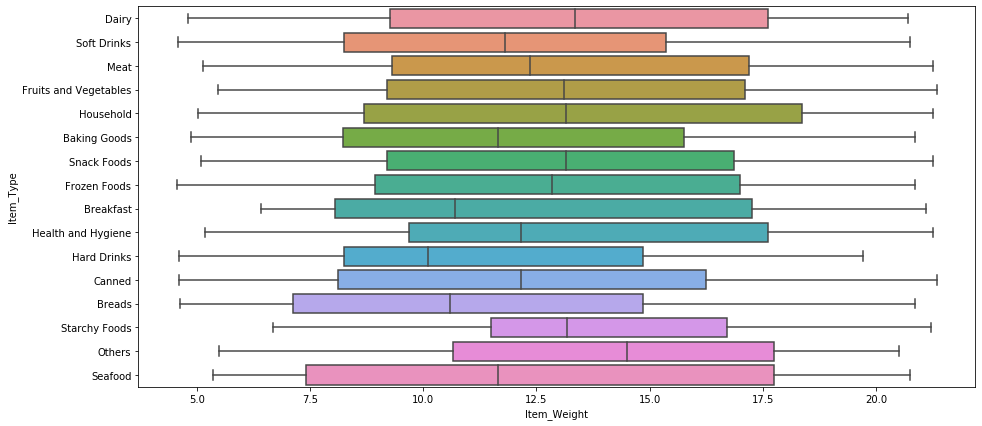

In [18]:
plt.figure(figsize=(15,7))
sns.boxplot(y="Item_Type", x="Item_Weight", data=train)

**It is better to replace Null values in "Item_Weight" column with average/median values of respective Item_type**

**----------------------------------------------------------------------------------------------------------------------**

**Sales vs Outlet_Type**

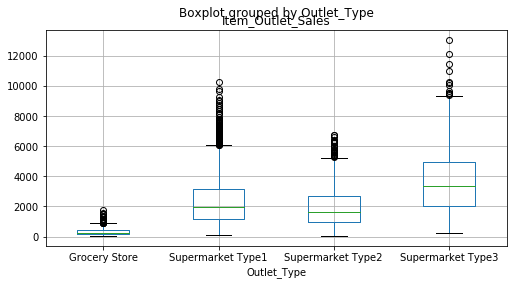

In [19]:
train.boxplot("Item_Outlet_Sales", by="Outlet_Type", figsize=(8, 4))

**Remark: As expected Sales of "Grocery Store" are least amongst all the categories**

**-----------------------------------------------------------------------------------------------------------------------------**

**MRP vs Item_type**

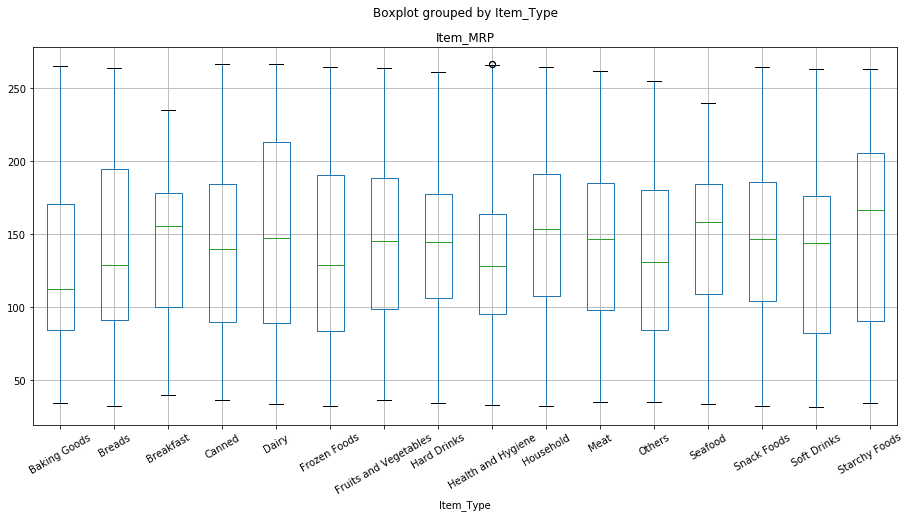

In [20]:
train.boxplot("Item_MRP", by="Item_Type", figsize=(15, 7), rot=30)

**Visualizing "Sales" vs "Outlet_size"**

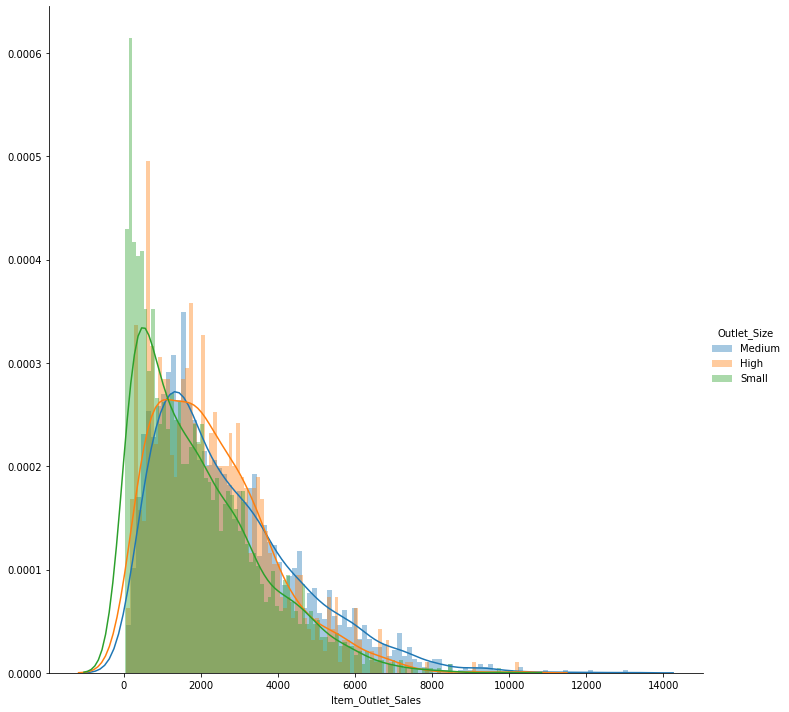

In [21]:
sns.FacetGrid(train, hue="Outlet_Size", height=10).map(sns.distplot, "Item_Outlet_Sales", bins=100).add_legend()

**Visualization of "Item_Outlet_Sales" vs "Outlet_Identifier" vs "Outlet_Location_Type"**

c:\users\amit sahu\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1440x504 with 0 Axes>

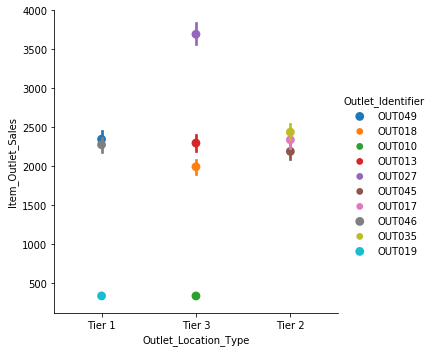

In [22]:
plt.figure(figsize=(20,7))
sns.factorplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', 
               hue='Outlet_Identifier', data=train)

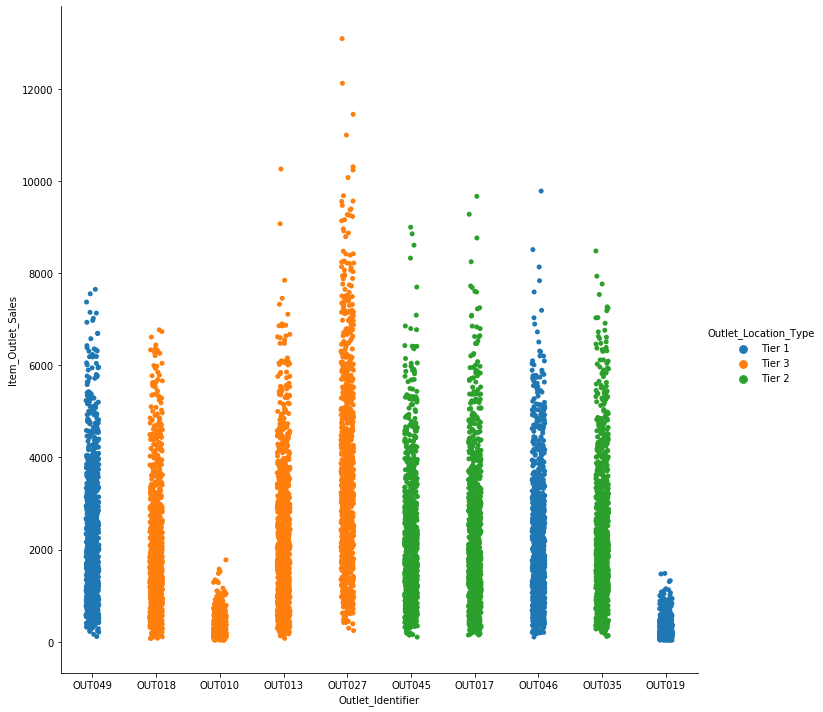

In [23]:
sns.catplot(x='Outlet_Identifier', y='Item_Outlet_Sales', 
               hue='Outlet_Location_Type', data=train, height=10)

**Remark: Some specific Outlet_Identifiers are in some specific Tier cities. Moreover it looks like highest sales are happening in Tier 3 cities (due to more number of Data points of Tier 3 cities)** 

Important question: In Tier 3 cities, what type of outlets are more?

In [24]:
pd.crosstab(train.Outlet_Location_Type, train.Outlet_Type)

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,,,,
Tier 1,528,1860,0,0
Tier 2,0,2785,0,0
Tier 3,555,932,928,935


**Don't know what to interpret from the below chart**

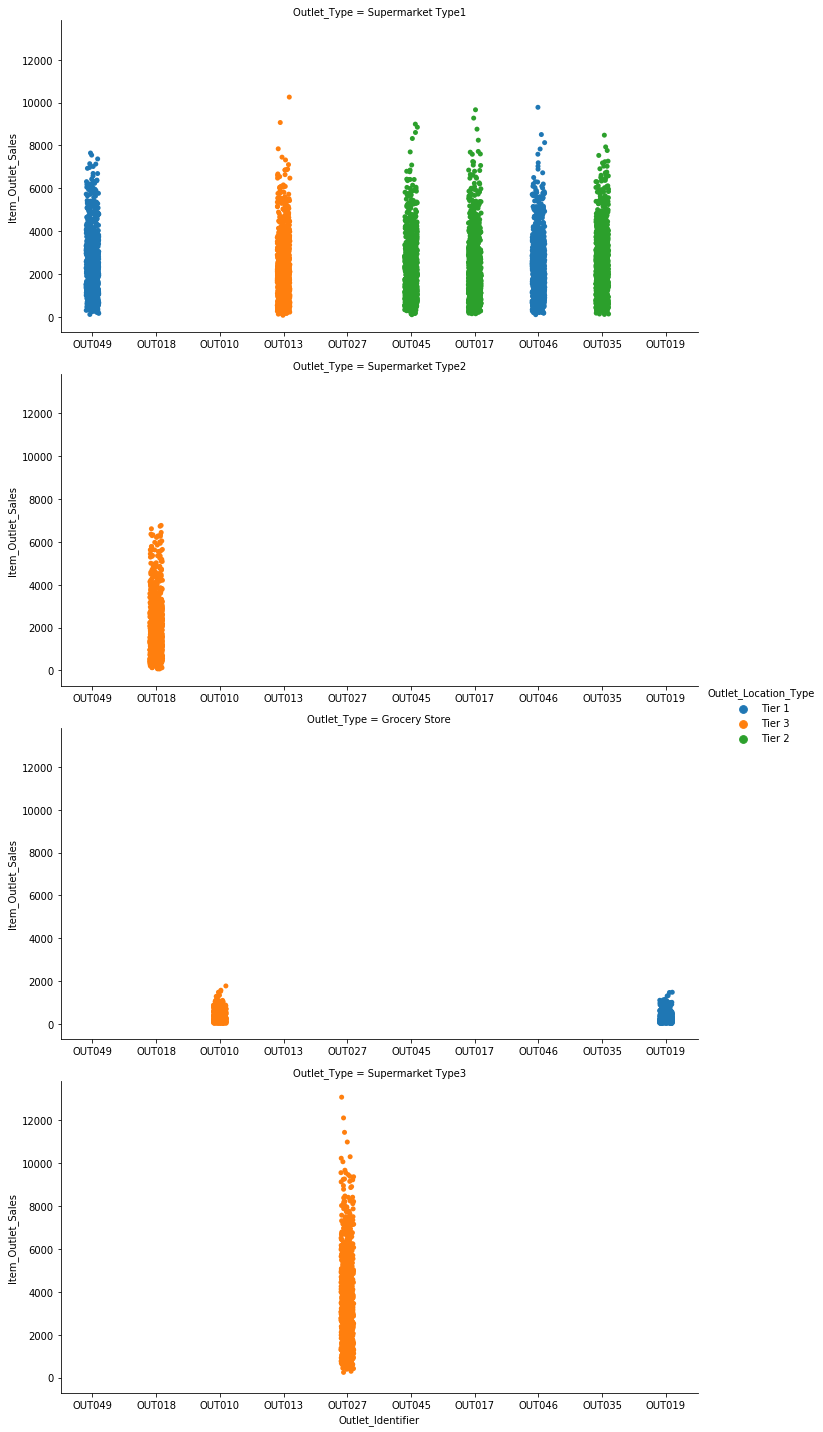

In [25]:
sns.catplot(x='Outlet_Identifier', y='Item_Outlet_Sales', 
               hue='Outlet_Location_Type', row='Outlet_Type',data=train, height=5, aspect=2, sharex=False)

# Treating Outlet_Size null values

In [26]:
test['Outlet_Size'] = test['Outlet_Size'].replace(np.NaN, "Unknown")

In [27]:
train['Outlet_Size'] = train['Outlet_Size'].replace(np.NaN, "Unknown")

In [28]:
pd.crosstab(train.Outlet_Identifier, train.Outlet_Size, margins=True)

Outlet_Size,High,Medium,Small,Unknown,All
Outlet_Identifier,,,,,
OUT010,0,0,0,555,555
OUT013,932,0,0,0,932
OUT017,0,0,0,926,926
OUT018,0,928,0,0,928
OUT019,0,0,528,0,528
OUT027,0,935,0,0,935
OUT035,0,0,930,0,930
OUT045,0,0,0,929,929
OUT046,0,0,930,0,930


In [29]:
pd.crosstab(test.Outlet_Identifier, test.Outlet_Size, margins=True)

Outlet_Size,High,Medium,Small,Unknown,All
Outlet_Identifier,,,,,
OUT010,0,0,0,370,370
OUT013,621,0,0,0,621
OUT017,0,0,0,617,617
OUT018,0,618,0,0,618
OUT019,0,0,352,0,352
OUT027,0,624,0,0,624
OUT035,0,0,620,0,620
OUT045,0,0,0,619,619
OUT046,0,0,620,0,620


**Remark: Treating null values in "Outlet_Size" as a separate category**

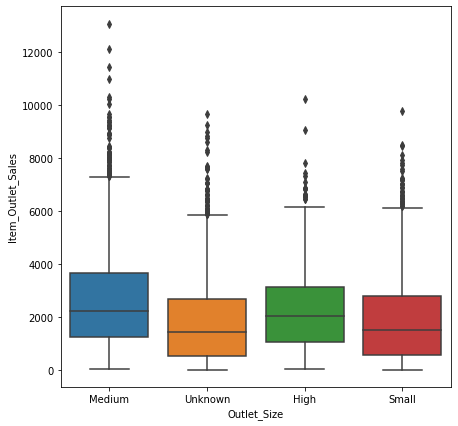

In [30]:
plt.figure(figsize=(7,7))
sns.boxplot(y="Item_Outlet_Sales", x="Outlet_Size", data=train)